# Random Forest Project -> LendingLoan Club :

For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.<br>

Here are what the columns represent:<br>

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.<br>
purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").<br>
int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.<br>
installment: The monthly installments owed by the borrower if the loan is funded.<br>
log.annual.inc: The natural log of the self-reported annual income of the borrower.<br>
dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).<br>
fico: The FICO credit score of the borrower.<br>
days.with.cr.line: The number of days the borrower has had a credit line.<br>
revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).<br>
revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).<br>
inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.<br>
delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.<br>
pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [6]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

## Exploratory Data Analysis : 

In [7]:
df.corr()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.159552
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
delinq.2yrs          0.008881
days.with.cr.line   -0.029237
log.annual.inc      -0.033439
fico                -0.149666
credit.policy       -0.158119
Name: not.fully.paid, dtype: float64

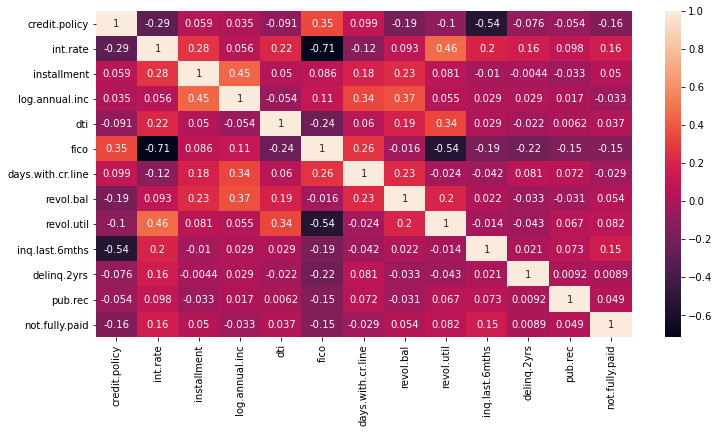

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

Text(0.5, 0, 'FICO')

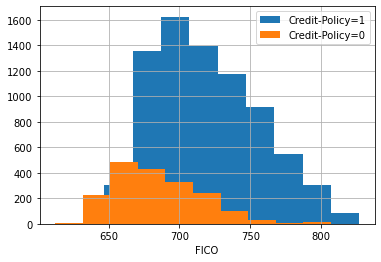

In [9]:
df[df['credit.policy']==1]['fico'].hist(label='Credit-Policy=1')
df[df['credit.policy']==0]['fico'].hist(label='Credit-Policy=0')
plt.legend()
plt.xlabel("FICO")

Text(0.5, 0, 'FICO')

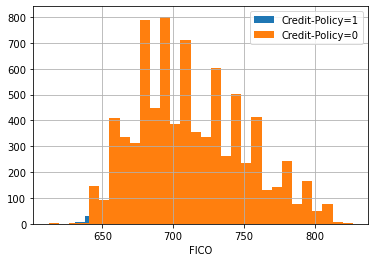

In [10]:
df[df['not.fully.paid']==1]['fico'].hist(label='Credit-Policy=1',bins=30)
df[df['not.fully.paid']==0]['fico'].hist(label='Credit-Policy=0',bins=30)
plt.legend()
plt.xlabel('FICO')

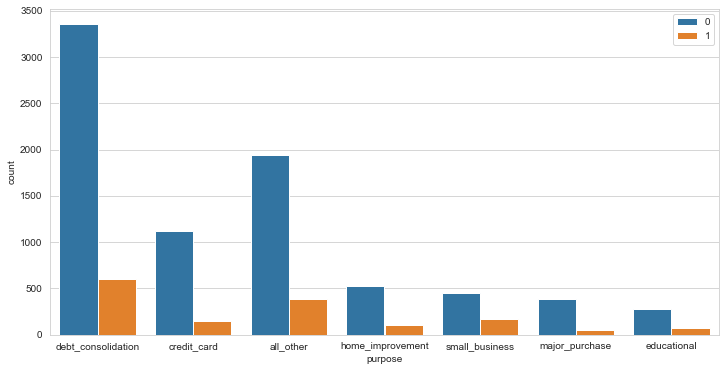

In [11]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='purpose',hue='not.fully.paid',data=df)
plt.legend()

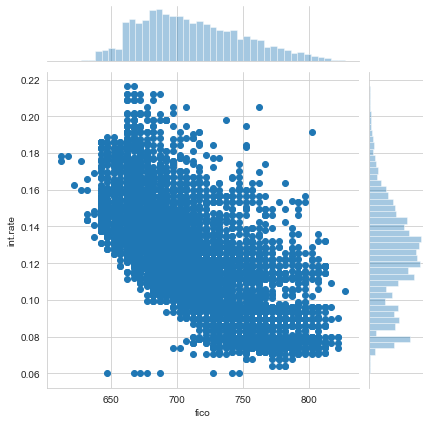

In [12]:
sns.jointplot(x='fico',y='int.rate',data=df)

<Figure size 864x288 with 0 Axes>

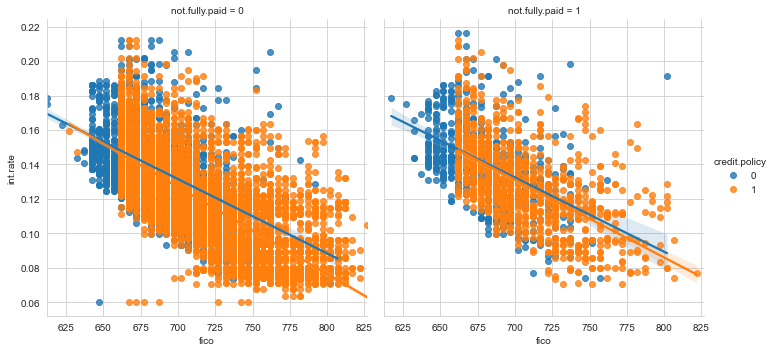

In [13]:
plt.figure(figsize=(12,4))
sns.lmplot(x='fico',y='int.rate',data=df,hue='credit.policy',col='not.fully.paid')

## Check For Data : 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [15]:
df.isnull().sum()    #Checking For Null Values:

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

## Dealing With Categorical Features : 

In [16]:
df.groupby('purpose').sum().T

purpose,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
credit.policy,1.835000e+03,1.020000e+03,3.223000e+03,2.540000e+02,5.120000e+02,3.710000e+02,4.950000e+02
int.rate,2.721921e+02,1.511096e+02,5.009364e+02,4.112820e+01,7.391160e+01,4.989270e+01,8.547590e+01
installment,5.709494e+05,4.032099e+05,1.420501e+06,7.461869e+04,2.120180e+05,1.064025e+05,2.685387e+05
log.annual.inc,2.528043e+04,1.394160e+04,4.318238e+04,3.618635e+03,7.046045e+03,4.739219e+03,6.899508e+03
dti,2.582631e+04,1.779344e+04,5.570056e+04,3.891310e+03,6.414230e+03,4.439870e+03,6.681050e+03
fico,1.667467e+06,8.955490e+05,2.785219e+06,2.429410e+05,4.559030e+05,3.157340e+05,4.456730e+05
days.with.cr.line,1.005059e+07,6.129542e+06,1.793723e+07,1.374948e+06,3.272055e+06,1.890449e+06,3.028220e+06
revol.bal,3.003037e+07,2.925319e+07,6.784953e+07,3.714312e+06,1.089979e+07,3.181995e+06,1.707276e+07
revol.util,9.256942e+04,6.764380e+04,2.141746e+05,1.330880e+04,2.155874e+04,1.418410e+04,2.480360e+04
inq.last.6mths,3.838000e+03,1.751000e+03,5.783000e+03,6.360000e+02,1.221000e+03,6.830000e+02,1.197000e+03


In [17]:
cat_feat=['purpose']

In [18]:
final_df=pd.get_dummies(df,columns=cat_feat,drop_first=True)

In [19]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [20]:
final_df.head(10)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
5,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,1,0,0,0,0,0
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,0,1,0,0,0,0
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,0,0,0,0,0,0
8,1,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0,0,0,0,1,0,0
9,1,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0,0,1,0,0,0,0


## Train Test Split : 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=final_df.drop('not.fully.paid',axis=1)
y=final_df['not.fully.paid']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

## Decision Tree Model : 

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree=DecisionTreeClassifier()

In [26]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
dtree.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
predict=dtree.predict(X_test)

In [29]:
df1=pd.DataFrame({'Actual Class':y_test,'Predicted Class':predict})
df1.head()

,Actual Class,Predicted Class
5244,0,0
1739,0,1
2780,0,0
7062,0,0
6661,0,0


In [30]:
l=[]
for x in df1['Predicted Class']:
    if x==1:
        l.append('Not Fully Paid')
    else:
        l.append('Fully Paid')
df1['Loan Status Class']=l

In [31]:
df1.head()

,Actual Class,Predicted Class,Loan Status Class
5244,0,0,Fully Paid
1739,0,1,Not Fully Paid
2780,0,0,Fully Paid
7062,0,0,Fully Paid
6661,0,0,Fully Paid


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DCC72554F0>,
      dtype=object)

<Figure size 864x432 with 0 Axes>

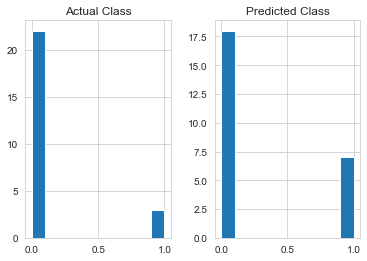

In [32]:
plt.figure(figsize=(12,6))
t=df1.head(25,)
t.hist()


## TEST CASE 1: 

In [33]:
#The details mentioned below is just a random test case with random values:
tc_1=pd.DataFrame([[0,0.1201,980,14.252631,20.00,805,6490.000000,39000,25.2,0,0,0,0,0,0,0,1,0]])
tc_1.shape

(1, 18)

In [34]:
vl_r=dtree.predict(tc_1)
print(vl_r)
for x in vl_r:
    if x==0:
        print('NOT FULLY PAID')
    else:
        print('PAID')

[0]
NOT FULLY PAID


## Metrics Performance Evaluation ( Decision Tree ) :

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [36]:
print('Confusion Matrix :')
print('\n')
print(confusion_matrix(y_test,predict))
print('\n')
print('Overall Classification Report : ')
print('\n')
print(classification_report(y_test,predict))
print('\n')
print('The Accuracy Score : ',round(accuracy_score(y_test,predict),2))

Confusion Matrix :


[[1999  432]
 [ 344   99]]


Overall Classification Report : 


              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



The Accuracy Score :  0.73


## Random Forest Model :

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc=RandomForestClassifier(n_estimators=200) #you can choose and play with any value for n_estimators

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
pred_1=rfc.predict(X_test)

In [41]:
df2=pd.DataFrame({'Actual Class':y_test,'Predicted Class':pred_1})
df2.head(10)

,Actual Class,Predicted Class
5244,0,0
1739,0,0
2780,0,0
7062,0,0
6661,0,0
6470,0,0
1719,0,0
3534,0,0
7903,0,0
5910,0,0


In [42]:
l=[]
for x in df2['Predicted Class']:
    if x==1:
        l.append('Not Fully Paid')
    else:
        l.append('Fully Paid')
df2['Loan Status Class']=l

In [43]:
df2.head()

,Actual Class,Predicted Class,Loan Status Class
5244,0,0,Fully Paid
1739,0,0,Fully Paid
2780,0,0,Fully Paid
7062,0,0,Fully Paid
6661,0,0,Fully Paid


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DCC73AD3D0>,
      dtype=object)

<Figure size 864x432 with 0 Axes>

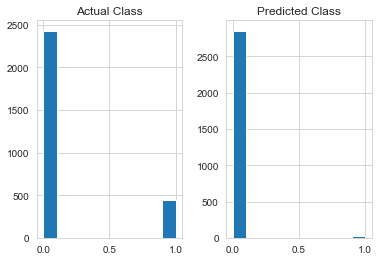

In [44]:
plt.figure(figsize=(12,6))
t=df2
t.hist()


## Test Case 2 :

In [45]:
df2.shape

(2874, 3)

In [46]:
X.head(2)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0


In [47]:
X.shape

(9578, 18)

In [48]:
#The details mentioned below is just a random test case with random values:
tc_2=pd.DataFrame([[1,0.1001,900,12.252631,16.00,745,5000.000000,45000,45.2,0,0,0,0,1,0,0,0,0]])
tc_2.shape

(1, 18)

Since the feature shape columns match...(18)...we can perform predictions and we can see results :

In [49]:
# This will print the status whther the loan is fully paid or not for the above mentioned test case:
vl_p=rfc.predict(tc_1)
print(vl_p)
for x in vl_p:
    if x==0:
        print('NOT FULLY PAID')
    else:
        print('PAID')


[0]
NOT FULLY PAID


## Metrics Performance Evaluation ( Random Forest ) :

In [50]:
print('Confusion Matrix :')
print('\n')
print(confusion_matrix(y_test,pred_1))
print('\n')
print('Overall Classification Report : ')
print('\n')
print(classification_report(y_test,pred_1))
print('\n')
print('The Accuracy Score : ',round(accuracy_score(y_test,pred_1),2))

Confusion Matrix :


[[2419   12]
 [ 434    9]]


Overall Classification Report : 


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.43      0.02      0.04       443

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874



The Accuracy Score :  0.84


Hence, Our Random Forest Has much better Accuracy Score , so , Random Forest performed Much Better..!!